<a href="https://colab.research.google.com/github/BardRimon/Study/blob/main/Introduction_in_NLP/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9A%D0%BB%D1%8E%D0%BA%D0%B8%D0%BD.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 6. Извлечение именованных сущностей


1. Маскировать все адреса и имена в электронном письме.
2. Собрать из набора описаний IT-вакансий топ-5 требуемых навыков (скиллов) для Java-разработчика.
3. Улучшить качество базовой предсказательной CRF-модели на тестовой выборке за счет добавления и модификации признаков.
4. Улучшить качество базовой предсказательной LSTM-CRF-модели на тестовой выборке за счет подбора предобученных эмбеддингов.

[презентация](https://docs.google.com/presentation/d/1BQCx8LK4m9f9kHN78vym-tj7Zz_NxL7c/edit?slide=id.p1#slide=id.p1)

## задача 1: маркировка имён в email

In [ ]:
! pip -q install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 52.1 MB/s eta 0:00:00


In [ ]:
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc


email = """ Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?

Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.

----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бородина (borodina_mra@pfur.ru), Светлана Анатольевна Петрова (petrova_sa@pfur.ru), Надежда Евгеньевна Железняк (zheleznyak_ne@pfur.ru), Тинатин Владимировна Чхиквадзе (chkhikvadze_tv@pfur.ru), Полина Александровна Бычкова (bychkova_pa@pfur.ru), Павел Михайлович Подолько (podolko_pm@pfur.ru), Ярослава Сергеевна Барышева (barysheva_yas@pfur.ru), Александр Викторович Клюкин (kliukin_av@pfur.ru), Лали Владиславовна Чебуханова (chebukhanova_lv@pfur.ru);
Тема: 15.05: Обсуждение результатов кейс-чемпионата;"""

print(email)

segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc = Doc(email)
doc.segment(segmenter)

doc.tag_ner(ner_tagger)
doc.ner.print()

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: Оксана Ивановна Александрова (alexandrova_oi@pfur.ru), Полина Юрьевна Повалко (povalko_pyu@pfur.ru), Валерия Владимировна Иванова (ivanova_vv@pfur.ru), Анна Дмитриевна Левшиц (levshits_ad@pfur.ru), Марина Игоревна Волк (volk_mi@pfur.ru), Валентин Викторович Матвиенко (matvienko_vv@pfur.ru), Елена Юрьевна Бурдовская (burdovskaya_eyu@pfur.ru), Гульчира Талгатовна Гарипова (garipova_gt@pfur.ru), Ольга Сергеевна Кочеткова (kochetkova_os@pfur.ru), Кристина Петровна Жикулина (zhikulina_kp@pfur.ru), Юлия Матвеевна Алюнина (aliunina_yum@pfur.ru), Мария Анатольевна Бород

In [ ]:
replacements = []
for span in doc.spans:
  if span.type == 'PER':
    replacements.append((span.start, span.stop, '[ИМЯ]'))


masked_email = email
for start, stop, replacement_text in sorted(replacements, key=lambda x: x[0], reverse=True):
  masked_email = masked_email[:start] + replacement_text + masked_email[stop:]

print(masked_email)

 Уважаемые коллеги, добрый вечер! К завтрашнему собранию собрала все баллы в одну таблицу (добавила в предыдущий документ новый лист), посмотрите, пожалуйста, всех ли добавила?
 
Вопросы к завтрашнему собранию:
1. Допускаем ли мы до презентации решений в финале всех, или кого-то придется отсеять?
2. Время проведения финала.
3. Окончательный список экспертов для финала.
4. Критерии оценивания для финала.
 
----------------
Кому: [ИМЯ] (alexandrova_oi@pfur.ru), [ИМЯ] (povalko_pyu@pfur.ru), [ИМЯ] (ivanova_vv@pfur.ru), [ИМЯ] (levshits_ad@pfur.ru), [ИМЯ] (volk_mi@pfur.ru), [ИМЯ] (matvienko_vv@pfur.ru), [ИМЯ] (burdovskaya_eyu@pfur.ru), [ИМЯ] (garipova_gt@pfur.ru), [ИМЯ] (kochetkova_os@pfur.ru), [ИМЯ] (zhikulina_kp@pfur.ru), [ИМЯ] (aliunina_yum@pfur.ru), [ИМЯ] (borodina_mra@pfur.ru), [ИМЯ] (petrova_sa@pfur.ru), [ИМЯ] (zheleznyak_ne@pfur.ru), [ИМЯ] (chkhikvadze_tv@pfur.ru), [ИМЯ] (bychkova_pa@pfur.ru), [ИМЯ] (podolko_pm@pfur.ru), [ИМЯ] (barysheva_yas@pfur.ru), [ИМЯ] (kliukin_av@pfur.ru), [ИМЯ]

## Поиск top 5 skills для java-разработчкика
Собрать из набора описаний IT-вакансий топ-5 требуемых навыков (скиллов) для Java-разработчика.

### тут я играюсь с датасетом, чтобы привести его к нормальному виду

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
# Set the path to the file you'd like to load
file_path = "IT_vacancies_full.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "konstantinalbul/russian-jokes",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-40-229c2ecfd29e>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 43.9M/43.9M [00:00<00:00, 67.7MB/s]

Extracting zip of IT_vacancies_full.csv...


In [ ]:
df.info()
javadf = df[df['Name'].str.contains('java', case=False) & ~df['Name'].str.contains('javascript', case=False)]
javadf.info()
javadf['Keys'].iloc[2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ids                 48564 non-null  int64  
 1   Employer            48564 non-null  object 
 2   Name                48564 non-null  object 
 3   Salary              48564 non-null  bool   
 4   From                15399 non-null  float64
 5   To                  10276 non-null  float64
 6   Experience          48564 non-null  object 
 7   Schedule            48564 non-null  object 
 8   Keys                48564 non-null  object 
 9   Description         48564 non-null  object 
 10  Area                48564 non-null  object 
 11  Professional roles  48564 non-null  object 
 12  Specializations     48564 non-null  object 
 13  Profarea names      48564 non-null  object 
 14  Published at        48564 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(11)
memory u

"['Java', 'Maven', 'Git', 'postman', 'Selenium IDE']"

In [ ]:
# решим на прямую
import ast
statistic = {}
for keys_str in javadf['Keys'].iloc[:100]:
    keys = ast.literal_eval(keys_str)


    for key in keys:
        print(key)
        if key in statistic:
            statistic[key] += 1
        else:
            statistic[key] = 1

sorted_statistic = dict(sorted(statistic.items(), key=lambda item: item[1], reverse=True))

sorted_statistic



PostgreSQL
Kotlin
Java
Spring Framework
dicom
Microservices
REST
Kafka
Java
Spring Framework
SQL
PostgreSQL
ООП
Unit Testing
Java
Maven
Git
postman
Selenium IDE
Java
QA automation
Java
Spring Framework
PostgreSQL
Highload
JVM
Java
Spring Framework
Hibernate ORM
Kafka
Spring Framework
Hibernate ORM
Apache Maven
Java
Java
Git
Unit Testing
Spring Framework
PostgreSQL
Spring Framework
REST
NoSQL
Web services
XML/JSON
Maven
Kubernaties
Git
GitFlow
Kafka
Design Patterns
RabbitMQ
Docker
REST
HTTP
Webpack
HTML
CSS
JOIN
API
JVM
Spring Framework
Желание учиться и развиваться
React
Vue.js
angular
Git
Eclipse
SQL
Java
Английский язык
Базы данных
Scrum
Java Core
Удаленная работа
Cистемы управления базами данных
Open source
DBeaver
Spring Framework
Hibernate ORM
Git
Java
Apache Maven
Spring Framework
Hibernate ORM
Git
Java
Apache Maven
JAVА SE
Java8
Spring
Groovy
Java 8
Spring Framework
gitflow
Docker
NoSQL
Kubernetes
CI/CD
Java
Java 11
Kotlin
Spring Framework
Spring Data
Spring Security
Git
Kafka
J

{'Java': 77,
 'Spring Framework': 42,
 'Git': 32,
 'SQL': 25,
 'PostgreSQL': 19,
 'ООП': 13,
 'Hibernate ORM': 12,
 'Английский язык': 12,
 'REST': 11,
 'Kotlin': 10,
 'Linux': 10,
 'Apache Maven': 9,
 'JavaScript': 9,
 'Kafka': 7,
 'Docker': 7,
 'MySQL': 6,
 'Maven': 5,
 'Atlassian Jira': 5,
 'Java EE': 5,
 'XML': 5,
 'JPA': 5,
 'JUnit': 5,
 'React': 4,
 'Spring Boot': 4,
 'Unit Testing': 3,
 'NoSQL': 3,
 'RabbitMQ': 3,
 'HTTP': 3,
 'HTML': 3,
 'Удаленная работа': 3,
 'Spring': 3,
 'Groovy': 3,
 'Kubernetes': 3,
 'Java 11': 3,
 'SOAP': 3,
 'Gradle': 3,
 'Selenium IDE': 2,
 'JVM': 2,
 'Design Patterns': 2,
 'CSS': 2,
 'Базы данных': 2,
 'Scrum': 2,
 'Java Core': 2,
 'Java 8': 2,
 'OpenShift': 2,
 'QA': 2,
 'JDBC': 2,
 'Python': 2,
 'HTML5': 2,
 'MongoDB': 2,
 'Java SE': 2,
 'Аналитическое мышление': 2,
 'Selenium': 2,
 'Функциональное тестирование': 2,
 'Нагрузочное тестирование': 2,
 'MS SQL': 2,
 'TestNG': 2,
 'dicom': 1,
 'Microservices': 1,
 'postman': 1,
 'QA automation': 1,
 'Hig

<Axes: >

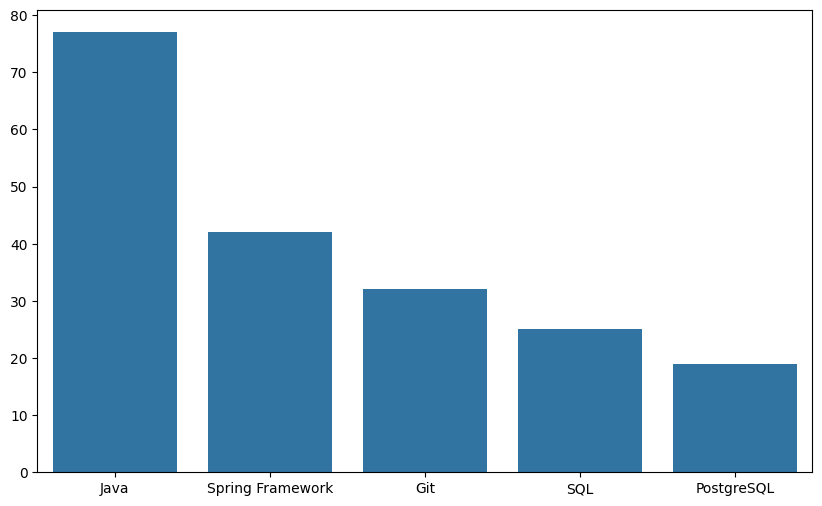

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_statistic.keys())[:5], y=list(sorted_statistic.values())[:5])